<a href="https://colab.research.google.com/github/hanzlayyy/FYDP/blob/main/FYDP_Notebook_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random as rd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/hanzlayyy/FYDP/main/data%20v1.csv')
#df.drop_duplicates(subset=df.iloc[:,:-1], keep='first', inplace=True, ignore_index=False)
df

,layer_height,infill_density,infill_pattern,nozzle_temperature,print_speed,material,roughness
0,0.02,90.0,grid,220,40.0,abs,25.0
1,0.02,90.0,honeycomb,225,40.0,abs,32.0
2,0.02,80.0,grid,230,40.0,abs,40.0
3,0.02,70.0,honeycomb,240,40.0,abs,68.0
4,0.02,90.0,grid,250,40.0,abs,92.0
...,...,...,...,...,...,...,...
654,0.20,40.0,NaN,195,30.0,pla,8.9
655,0.20,50.0,NaN,195,30.0,pla,4.9
656,0.30,30.0,NaN,195,30.0,pla,5.1
657,0.30,40.0,NaN,195,30.0,pla,19.3


In [68]:
df.dropna(thresh=6, inplace=True)
df

,layer_height,infill_density,infill_pattern,nozzle_temperature,print_speed,material,roughness
0,0.02,90.0,grid,220,40.0,abs,25.0
1,0.02,90.0,honeycomb,225,40.0,abs,32.0
2,0.02,80.0,grid,230,40.0,abs,40.0
3,0.02,70.0,honeycomb,240,40.0,abs,68.0
4,0.02,90.0,grid,250,40.0,abs,92.0
...,...,...,...,...,...,...,...
654,0.20,40.0,NaN,195,30.0,pla,8.9
655,0.20,50.0,NaN,195,30.0,pla,4.9
656,0.30,30.0,NaN,195,30.0,pla,5.1
657,0.30,40.0,NaN,195,30.0,pla,19.3


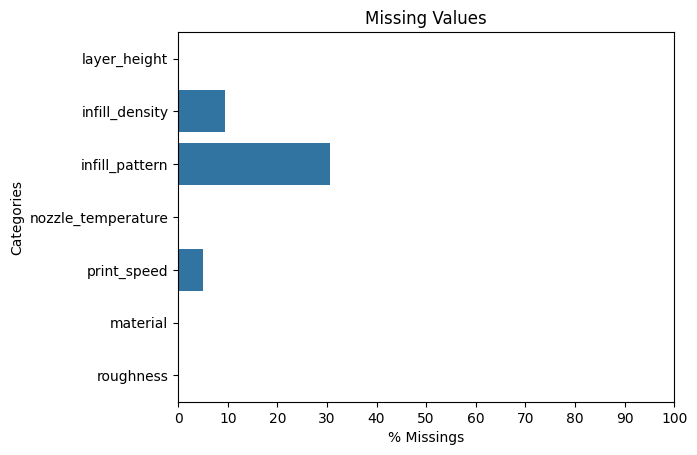

In [69]:
x_1 = pd.Series(df.isnull().mean()*100).values
y_1 = pd.Series(df.isnull().mean()*100).index
sns.barplot(x=x_1, y=y_1, orient='h')
plt.xlabel('% Missings')
plt.xticks(range(0, 110, 10))
plt.ylabel('Categories')
plt.title('Missing Values')
plt.show()

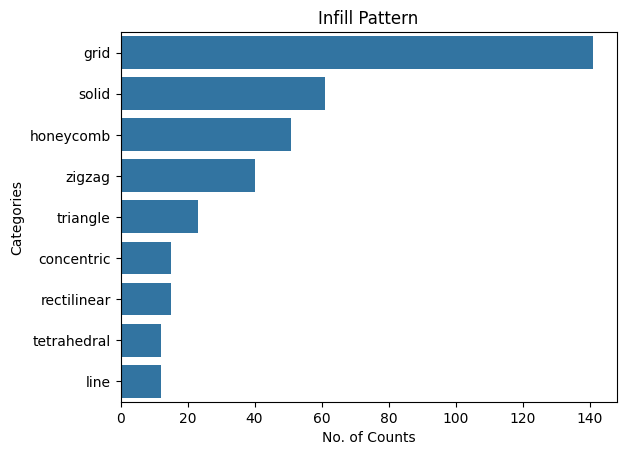

In [70]:
x_2 = pd.Series(df['infill_pattern'].value_counts()).values
y_2 = pd.Series(df['infill_pattern'].value_counts()).index
sns.barplot(x=x_2, y=y_2, orient='h')
plt.xlabel('No. of Counts')
plt.ylabel('Categories')
plt.title('Infill Pattern')
plt.show()

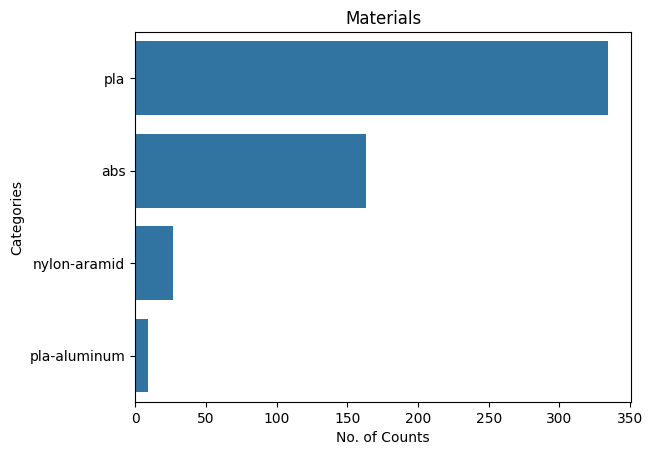

In [71]:
df['material'].value_counts()
x_3 = pd.Series(df['material'].value_counts()).values
y_3 = pd.Series(df['material'].value_counts()).index
sns.barplot(x=x_3, y=y_3, orient='h')
plt.xlabel('No. of Counts')
plt.ylabel('Categories')
plt.title('Materials')
plt.show()

In [72]:
zero_missing = pd.get_dummies(df[~df.isnull().any(axis=1)], columns=['infill_pattern','material'], dtype=int)
zero_missing.sample(10)


,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
478,0.40,10.0,220,120.0,9.0,0,0,1,0,0,0,0,0,0,1,0
274,0.15,30.0,200,80.0,2.0,0,0,0,0,0,0,0,1,0,1,0
141,0.20,30.0,195,100.0,17.0,0,0,0,0,0,0,0,1,0,1,0
547,0.30,10.0,215,90.0,1.0,0,0,0,0,1,0,0,0,1,0,0
3,0.02,70.0,240,40.0,68.0,0,0,1,0,0,0,0,0,1,0,0
159,0.20,100.0,240,100.0,15.0,0,0,0,0,0,0,0,1,1,0,0
467,0.25,10.0,220,40.0,6.0,0,0,1,0,0,0,0,0,0,1,0
363,0.20,100.0,200,60.0,4.0,0,0,0,1,0,0,0,0,0,0,1
603,0.20,10.0,200,40.0,14.0,0,1,0,0,0,0,0,0,0,1,0
11,0.06,20.0,225,60.0,92.0,0,0,1,0,0,0,0,0,1,0,0


In [73]:
missing = df[df.isnull().any(axis=1)]
missing_categorical = df[df['infill_pattern'].isnull()]
missing_categorical = pd.get_dummies(missing_categorical, columns=['material'], dtype=int)
missing_categorical[['material_pla-aluminum']] = 0
missing_categorical = missing_categorical.reindex(columns=list(zero_missing.columns))
missing_categorical


,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
190,0.20,30.0,210,30.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
191,0.15,20.0,190,75.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
192,0.20,10.0,190,30.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
193,0.20,20.0,200,75.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
194,0.10,10.0,190,120.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.20,40.0,195,30.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
655,0.20,50.0,195,30.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
656,0.30,30.0,195,30.0,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
657,0.30,40.0,195,30.0,19.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


In [74]:
missing_numerical = missing[~missing['infill_pattern'].isnull()]
missing_numerical = pd.get_dummies(missing_numerical, columns=['infill_pattern','material'], dtype=int)
missing_numerical.drop(columns='infill_pattern_tetrahedral')
missing_numerical[['infill_pattern_rectilinear','infill_pattern_solid']] = 0
missing_numerical[['material_pla-aluminum']] = 0
missing_numerical = missing_numerical.reindex(columns=list(zero_missing.columns))
missing_numerical

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
50,0.20,70.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0
51,0.20,80.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0
52,0.20,90.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0
53,0.20,70.0,290,NaN,2.0,0,0,1,0,0,0,0,0,0,0,0
54,0.20,80.0,290,NaN,2.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.05,NaN,205,50.0,6.0,0,1,0,0,0,0,0,0,0,1,0
570,0.15,NaN,190,50.0,14.0,0,1,0,0,0,0,0,0,0,1,0
571,0.25,NaN,220,50.0,17.0,0,1,0,0,0,0,0,0,0,1,0
572,0.25,NaN,205,30.0,18.0,0,1,0,0,0,0,0,0,0,1,0


In [75]:
n = []
mse = []
for r in range(120):
  k_1=3+2*r
  knn_1 = KNNImputer(n_neighbors=k_1, weights='distance')
  X_train, X_test = train_test_split(zero_missing, test_size=0.2, random_state=42)
  pd.DataFrame(knn_1.fit_transform(X_train))
  X_test.columns = zero_missing.columns
  X_test_copy = X_test.copy()
  X_test_copy
  np.random.seed(15)
  features =['infill_density', 'print_speed']
  for col in X_test_copy[features]:
    X_test_copy.loc[X_test_copy.sample(frac=0.1, replace=True).index,col] = np.nan
  X_test_copy.isnull().mean()
  X_test_predicted = pd.DataFrame(knn_1.transform(X_test_copy), columns=X_test_copy.columns)
  mse_1= mean_squared_error(X_test['infill_density'], X_test_predicted['infill_density'])
  mse_2= mean_squared_error(X_test['print_speed'], X_test_predicted['print_speed'])
  mse_3 =mse_1*mse_2
  n.append(k_1)
  mse.append(mse_3)

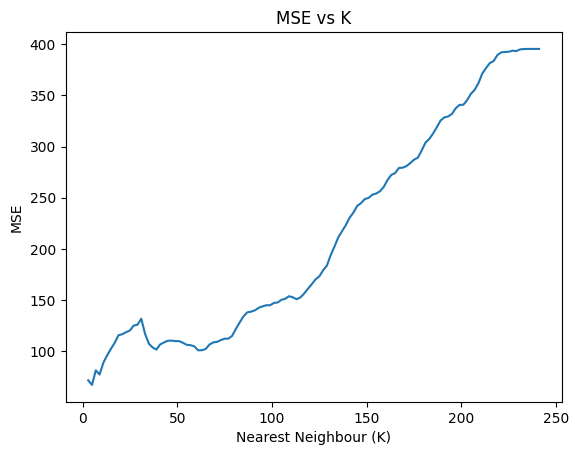

5

In [76]:
plt.plot(n, mse)
plt.xlabel('Nearest Neighbour (K)')
plt.ylabel('MSE')
plt.title('MSE vs K')
plt.show()
mse.index(min(mse))*2+3

In [77]:
knn_1 = KNNImputer(n_neighbors=mse.index(min(mse))*2+3)
knn_1.fit_transform(X_train)
missing_numerical_filled = pd.DataFrame(knn_1.transform(missing_numerical), columns=missing_numerical.columns)
zero_missing = pd.concat([zero_missing, missing_numerical_filled], axis=0)
zero_missing

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.02,90.0,220.0,40.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.02,90.0,225.0,40.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.02,80.0,230.0,40.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.02,70.0,240.0,40.0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.02,90.0,250.0,40.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.05,32.0,205.0,50.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
73,0.15,32.0,190.0,50.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,0.25,64.0,220.0,50.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,0.25,62.0,205.0,30.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
list(zero_missing.columns)[5:13]

['infill_pattern_concentric',
 'infill_pattern_grid',
 'infill_pattern_honeycomb',
 'infill_pattern_line',
 'infill_pattern_rectilinear',
 'infill_pattern_solid',
 'infill_pattern_triangle',
 'infill_pattern_zigzag']

In [79]:
n = []
r2 = []
for r in range(120):
  k=3+2*r
  knn = KNNImputer(n_neighbors=k, weights='distance')
  X_train, X_test = train_test_split(zero_missing, test_size=0.2, random_state=42)
  pd.DataFrame(knn.fit_transform(X_train))
  X_test.columns = zero_missing.columns
  X_test_copy = X_test.copy()
  X_test_copy
  np.random.seed(42)
  features = list(zero_missing.columns)[5:13]
  for col in X_test_copy[features]:
    X_test_copy.loc[X_test_copy.sample(frac=0.1, replace=True).index,col] = np.nan
  X_test_copy.isnull().mean()
  X_test_predicted = pd.DataFrame(knn.transform(X_test_copy), columns=X_test_copy.columns)
  r1 = mean_squared_error(X_test.loc[:,list(zero_missing.columns)[5:13]], X_test_predicted.loc[:,list(zero_missing.columns)[5:13]])
  n.append(k)
  r2.append(r1)

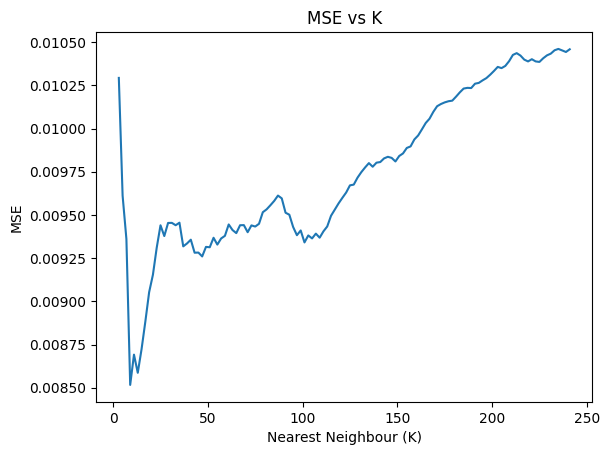

9

In [80]:
plt.plot(n, r2)
plt.xlabel('Nearest Neighbour (K)')
plt.ylabel('MSE')
plt.title('MSE vs K')
plt.show()
r2.index(min(r2))*2+3

In [81]:
knn_2 = KNNImputer(n_neighbors=r2.index(min(r2))*2+3)
knn_2.fit_transform(X_train)
missing_categorical_filled = pd.DataFrame(knn_1.transform(missing_categorical), columns=missing_categorical.columns)
zero_missing = pd.concat([zero_missing, missing_categorical_filled], axis=0)
zero_missing
df1 = zero_missing
df1

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.02,90.0,220.0,40.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.02,90.0,225.0,40.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.02,80.0,230.0,40.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.02,70.0,240.0,40.0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.02,90.0,250.0,40.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.20,40.0,195.0,30.0,8.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
159,0.20,50.0,195.0,30.0,4.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
160,0.30,30.0,195.0,30.0,5.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
161,0.30,40.0,195.0,30.0,19.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
for row in range(len(df1)):
  max = df1.iloc[row,5:13].max()
  for a in range(9):
    if  df1.iloc[row,5+a]== max and max!=0:
      df1.iat[row,a+5]=1
    else:
      df1.iat[row,a+5]=0

In [83]:
df1 = df1[df1.iloc[:,5:13].sum(axis=1)!=2]
df1 = df1.reindex(columns=['layer_height', 'infill_density', 'nozzle_temperature', 'print_speed', 'infill_pattern_concentric', 'infill_pattern_grid',
                    'infill_pattern_honeycomb', 'infill_pattern_line','infill_pattern_rectilinear', 'infill_pattern_solid','infill_pattern_triangle',
                    'infill_pattern_zigzag', 'material_abs','material_pla', 'material_pla-aluminum','roughness'])
df1

,layer_height,infill_density,nozzle_temperature,print_speed,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum,roughness
0,0.02,90.0,220.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0
1,0.02,90.0,225.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.0
2,0.02,80.0,230.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
3,0.02,70.0,240.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,68.0
4,0.02,90.0,250.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.20,40.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.9
159,0.20,50.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.9
160,0.30,30.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.1
161,0.30,40.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.3


In [84]:
df1.to_csv('data_v2.csv')

In [85]:
X = df1.iloc[:,0:15]
y = df1.iloc[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
param_grid = {'n_estimators':list(range(0, 401, 50))}
reg = GridSearchCV(RandomForestRegressor(random_state=42),param_grid=param_grid)
reg.fit(X_train,y_train)
rt = RandomForestRegressor(n_estimators=reg.best_params_['n_estimators'], random_state=42)
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
r2_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

0.681017316330876

In [86]:
'''!pip install geneticalgorithm

from geneticalgorithm import geneticalgorithm as ga
def obj_fun(X):
    X = [X]
    results = rt.predict(X)
    return results'''

'!pip install geneticalgorithm\n\nfrom geneticalgorithm import geneticalgorithm as ga\ndef obj_fun(X):\n    X = [X]\n    results = rt.predict(X)\n    return results'

In [87]:
boundaries = np.array(X.describe().loc[["min","max"],:].T)


In [88]:
'''algorithm_param = {'max_num_iteration': 10,\
                   'population_size':100,\
                   'mutation_probability':0.01,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.9,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
ga_model=ga(function=obj_fun, dimension=15,variable_type='real',variable_boundaries=boundaries, algorithm_parameters=algorithm_param)
ga_model.run()'''

"algorithm_param = {'max_num_iteration': 10,                   'population_size':100,                   'mutation_probability':0.01,                   'elit_ratio': 0.01,                   'crossover_probability': 0.9,                   'parents_portion': 0.3,                   'crossover_type':'uniform',                   'max_iteration_without_improv':None}\nga_model=ga(function=obj_fun, dimension=15,variable_type='real',variable_boundaries=boundaries, algorithm_parameters=algorithm_param)\nga_model.run()"

In [89]:
'''result = ga_model.output_dict
result'''

'result = ga_model.output_dict\nresult'

In [90]:
'''print("Results: ")
print('Layer Height:', result['variable'][0])
print('Infill Density:', result['variable'][1])
print('Nozzel Temperature:', result['variable'][2])
print('Print Speed:', result['variable'][3])'''

'print("Results: ")\nprint(\'Layer Height:\', result[\'variable\'][0])\nprint(\'Infill Density:\', result[\'variable\'][1])\nprint(\'Nozzel Temperature:\', result[\'variable\'][2])\nprint(\'Print Speed:\', result[\'variable\'][3])'

In [91]:
#!pip install pandas-profiling

In [92]:
"""from ydata_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')"""

"from ydata_profiling import ProfileReport\nprof = ProfileReport(df1)\nprof.to_file(output_file='output.html')"

In [93]:
X = df1.iloc[:,0:15]
y = df1.iloc[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train_scaled.describe(),1)

,layer_height,infill_density,nozzle_temperature,print_speed,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
count,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-1.2,-1.1,-1.4,-0.2,-0.8,-0.4,-0.2,-0.2,-0.5,-0.2,-0.3,-0.5,-1.4,-0.1
25%,-0.9,-0.9,-0.7,-0.8,-0.2,-0.8,-0.4,-0.2,-0.2,-0.5,-0.2,-0.3,-0.5,-1.4,-0.1
50%,-0.4,-0.3,-0.3,-0.1,-0.2,-0.8,-0.4,-0.2,-0.2,-0.5,-0.2,-0.3,-0.5,0.7,-0.1
75%,0.8,0.9,0.3,0.6,-0.2,1.2,-0.4,-0.2,-0.2,-0.5,-0.2,-0.3,-0.5,0.7,-0.1
max,2.4,1.5,3.3,2.9,5.9,1.2,2.6,4.6,5.2,2.2,4.3,2.9,1.9,0.7,7.5


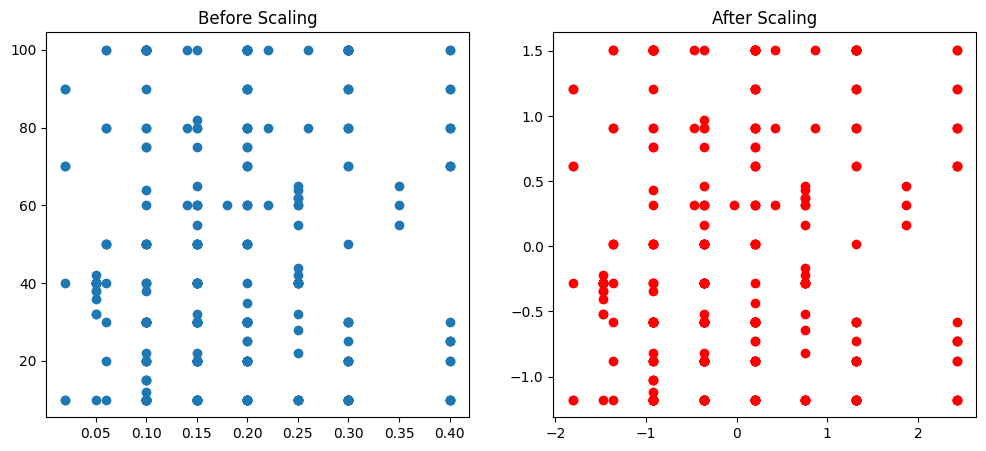

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['layer_height'], X_train['infill_density'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['layer_height'], X_train_scaled['infill_density'],color='red')
ax2.set_title("After Scaling")
plt.show()

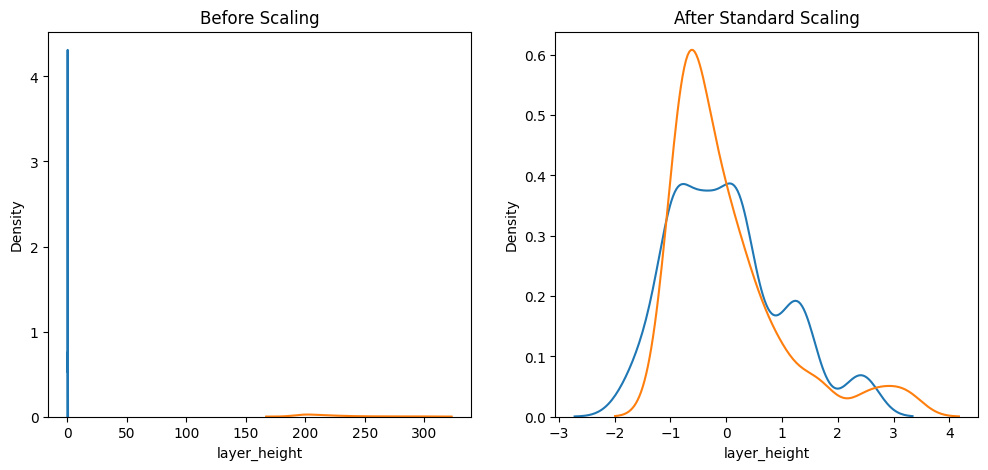

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['layer_height'], ax=ax1)
sns.kdeplot(X_train['nozzle_temperature'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['layer_height'], ax=ax2)
sns.kdeplot(X_train_scaled['nozzle_temperature'], ax=ax2)
plt.show()

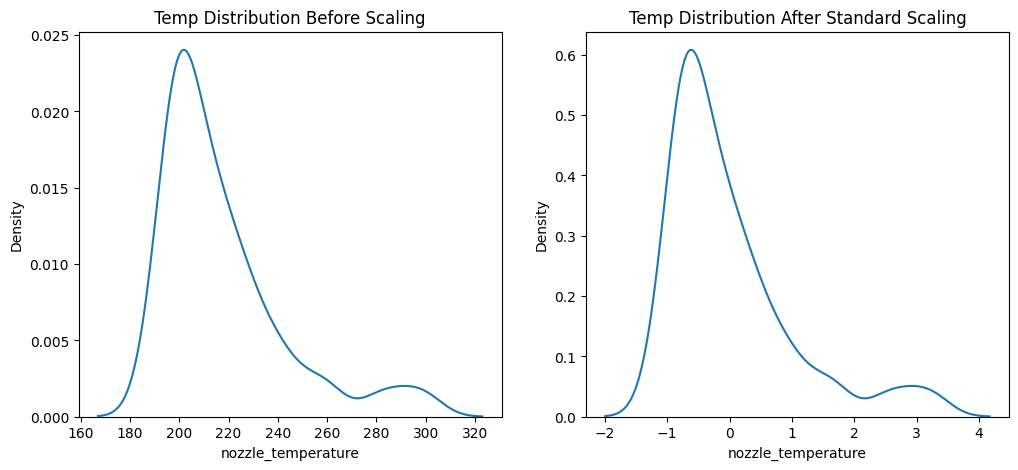

In [96]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Temp Distribution Before Scaling')
sns.kdeplot(X_train['nozzle_temperature'], ax=ax1)

# after scaling
ax2.set_title('Temp Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['nozzle_temperature'], ax=ax2)
plt.show()

In [97]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

In [116]:
#poly = PolynomialFeatures(degree=9,include_bias=True)
#X_train_trans = poly.fit_transform(X_train_scaled)
#X_test_trans = poly.transform(X_test_scaled)
kNN = KNeighborsRegressor(n_neighbors=2, weights='distance' )
kNN.fit(X_train_scaled,y_train)
y_pred = kNN.predict(X_test_scaled)
r2_score(y_pred,y_test)

0.706959898070591

In [117]:
def obj_fun(X):
  X=[X]
  results = kNN.predict(X)
  return results

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||________________________________________________ 3.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||_______________________________________________ 6.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||_____________________________________________ 10.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||___________________________________________ 13.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||__________________________________________ 16.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||______________________________________ 23.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||_____________________________________ 26.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||___________________________________ 30.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||_________________________________ 33.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||________________________________ 36.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||______________________________ 40.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||||____________________________ 43.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||___________________________ 46.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||_________________________ 50.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||||_______________________ 53.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||||||||||______________________ 56.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||||||||||||____________________ 60.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||||||||||||||__________________ 63.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||||||||||_________________ 66.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||||||||||||_______________ 70.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||||||||||||||_____________ 73.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||||||||||||||||||||____________ 76.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||||||||||||||||||||||||________ 83.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||||||||||||||||||||_______ 86.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||||||||||||||||||||||_____ 90.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||||||||||||||||||||||||___ 93.3% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

||||||||||||||||||||||||||||||||||||||||||||||||__ 96.7% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

 The best solution found:
 [3.14397379e-01 9.74409465e+01 1.95344739e+02 1.18735937e+02
 8.83804165e-01 6.72959589e-01 4.52977952e-01 7.79413062e-01
 4.79036932e-01 8.47065007e-01 5.34636948e-01 6.16379333e-01
 2.18518340e-01 1.24396190e-01 5.49395999e-01]

 Objective function:
 2.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

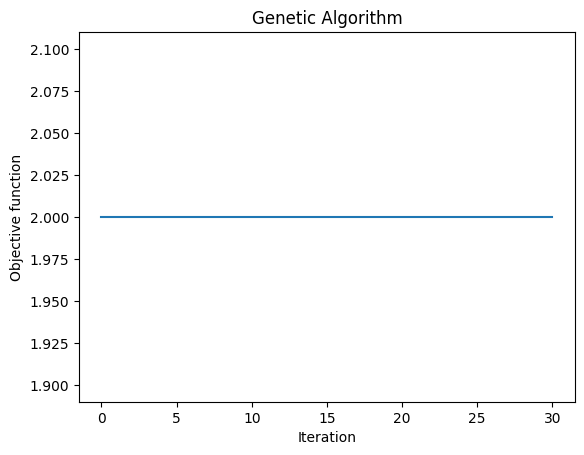

Best parameters found:
{'max_num_iteration': 30, 'population_size': 100, 'mutation_probability': 0.01, 'elit_ratio': 0.01, 'crossover_probability': 0.6, 'parents_portion': 0.2, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}


In [118]:
import itertools

# Define parameter grid
param_grid = {
    'max_num_iteration': [30, 50, 100],
    'population_size': [100, 250, 500],
    'mutation_probability': [0.01, 0.02, 0.05],
    'elit_ratio': [0.01, 0.02, 0.05],
    'crossover_probability': [0.6, 0.8, 0.9],
    'parents_portion': [0.2, 0.4, 0.6],
    'crossover_type': ['uniform', 'one_point', 'two_point'],
    'max_iteration_without_improv': [None, 10, 20]
}

best_score = float('inf')
best_params = None

# Boolean flag to control the loop
found_best_params = False

# Iterate over all parameter combinations
for params in itertools.product(*param_grid.values()):
    if found_best_params:
        break  # Exit the loop if the best parameters are found
    # Set up parameters for the GA model
    algorithm_param = dict(zip(param_grid.keys(), params))

    # Initialize GA model
    ga_model = ga(function=obj_fun, dimension=15, variable_type='real', variable_boundaries=boundaries, algorithm_parameters=algorithm_param)

    # Run the GA model
    ga_model.run()

    # Get the function value (objective value)
    function_value = ga_model.output_dict['function']

    # Update the best score and parameters if needed
    if function_value < best_score:
        best_score = function_value
        best_params = algorithm_param
        # Set the flag to indicate we've found the best parameters
        found_best_params = True

# Print the best parameters found
print("Best parameters found:")
print(best_params)


In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [100]:
X_train_scaled = X_train_scaled.to_numpy()
X_train_scaled_1 = X_train_scaled.reshape(-1,1)
X_train_scaled_1.shape

'X_train_scaled = X_train_scaled.to_numpy()\nX_train_scaled_1 = X_train_scaled.reshape(-1,1)\nX_train_scaled_1.shape'

In [101]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Step 7: Evaluate the model
loss,acurracy = model.evaluate(X_test,y_test)
#print(f'{acurracy}')
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Epoch 1/100
32/32 [==============================] - 2s 11ms/step - loss: 4934.8555 - accuracy: 0.0095 - val_loss: 3824.5085 - val_accuracy: 0.0375
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4684.8804 - accuracy: 0.0315 - val_loss: 3362.2324 - val_accuracy: 0.0375
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 3837.8577 - accuracy: 0.0315 - val_loss: 3058.9817 - val_accuracy: 0.0375
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 3500.1750 - accuracy: 0.0315 - val_loss: 2725.8916 - val_accuracy: 0.0375
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3187.3193 - accuracy: 0.0315 - val_loss: 2696.3430 - val_accuracy: 0.0375
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 2980.2163 - accuracy: 0.0315 - val_loss: 2490.9438 - val_accuracy: 0.0375
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 2813.4167 - accuracy: 0.0315 - val_loss: 250

In [102]:
pip install geneticalgorithm

In [110]:
def obj_fun(solution):
    solution = np.array(solution).reshape(1, -1)  # Ensure input shape is (1, num_features)
    #dsolution = xgb.DMatrix(solution)
    solution = [solution]
    prediction = model.predict(solution)
    return prediction[0][0]

1/1 [==============================] - 0s 27ms/step
 The best solution found:
 [2.53980019e-01 9.49128731e+01 1.99354481e+02 7.69604245e+01
 8.18371825e-01 5.72008336e-02 8.19377825e-01 8.93885209e-01
 1.04517441e-01 7.06731101e-01 6.88125459e-01 5.37550380e-01
 6.96101323e-02 3.22091671e-01 5.84105564e-01]

 Objective function:
 95.18305206298828


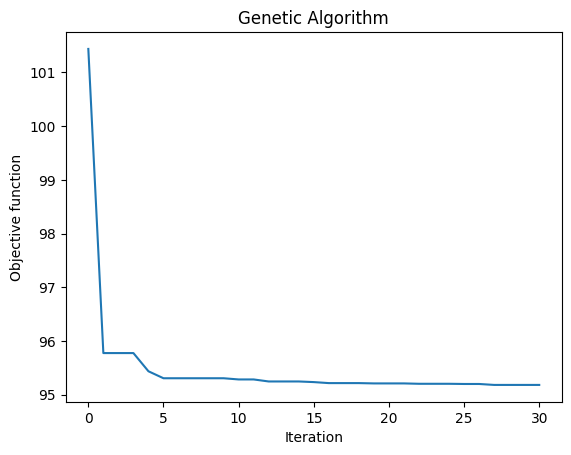

Best parameters found:
{'max_num_iteration': 30, 'population_size': 100, 'mutation_probability': 0.01, 'elit_ratio': 0.01, 'crossover_probability': 0.6, 'parents_portion': 0.2, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}


In [112]:
boundaries = np.array(X.describe().loc[["min","max"],:].T)
param_grid = {
    'max_num_iteration': [30, 50, 100],
    'population_size': [100, 250, 500,1000],
    'mutation_probability': [0.01, 0.02, 0.05],
    'elit_ratio': [0.01, 0.02, 0.05],
    'crossover_probability': [0.6, 0.8, 0.9],
    'parents_portion': [0.2, 0.4, 0.6],
    'crossover_type': ['uniform', 'one_point', 'two_point'],
    'max_iteration_without_improv': [None, 10, 20]
}

best_score = float('inf')
best_params = None
found_best_params = False

for max_num_iteration in param_grid['max_num_iteration']:
    for population_size in param_grid['population_size']:
        for mutation_probability in param_grid['mutation_probability']:
            for elit_ratio in param_grid['elit_ratio']:
                for crossover_probability in param_grid['crossover_probability']:
                    for parents_portion in param_grid['parents_portion']:
                        for crossover_type in param_grid['crossover_type']:
                            for max_iteration_without_improv in param_grid['max_iteration_without_improv']:
                                # Set up parameters for the GA model
                                algorithm_param = {
                                    'max_num_iteration': max_num_iteration,
                                    'population_size': population_size,
                                    'mutation_probability': mutation_probability,
                                    'elit_ratio': elit_ratio,
                                    'crossover_probability': crossover_probability,
                                    'parents_portion': parents_portion,
                                    'crossover_type': crossover_type,
                                    'max_iteration_without_improv': max_iteration_without_improv
                                }

                                # Initialize GA model
                                ga_model = ga(function=obj_fun, dimension=15, variable_type='real', variable_boundaries=boundaries, algorithm_parameters=algorithm_param)

                                # Run the GA model
                                ga_model.run()

                                # Get the function value (objective value)
                                function_value = ga_model.output_dict['function']

                                # Update the best score and parameters if needed
                                if function_value < best_score:
                                    best_score = function_value
                                    best_params = algorithm_param

                                    # Set the flag to indicate we've found the best parameters
                                    found_best_params = True

                                    # Break out of the loop
                                    break
                            if found_best_params:
                                break
                        if found_best_params:
                            break
                    if found_best_params:
                        break
                if found_best_params:
                    break
            if found_best_params:
                break
        if found_best_params:
            break
    if found_best_params:
        break

# Print the best parameters found
print("Best parameters found:")
print(best_params)


In [103]:
X_train_scaled

,layer_height,infill_density,nozzle_temperature,print_speed,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.198712,-0.581461,-0.886976,1.234671,-0.168812,-0.813073,-0.388233,-0.21793,-0.19119,-0.458657,-0.230327,2.869243,-0.52976,0.734003,-0.133973
1,0.198712,1.508669,-0.096562,-1.256846,-0.168812,-0.813073,-0.388233,-0.21793,-0.19119,2.180281,-0.230327,-0.348524,-0.52976,0.734003,-0.133973
2,1.314536,-0.581461,-0.491769,-0.426340,-0.168812,1.229902,-0.388233,-0.21793,-0.19119,-0.458657,-0.230327,-0.348524,-0.52976,0.734003,-0.133973
3,-0.917112,-1.029346,0.298645,0.570267,-0.168812,-0.813073,2.575775,-0.21793,-0.19119,-0.458657,-0.230327,-0.348524,-0.52976,0.734003,-0.133973
4,1.314536,1.508669,-0.689372,-1.422947,-0.168812,-0.813073,-0.388233,-0.21793,-0.19119,2.180281,-0.230327,-0.348524,-0.52976,0.734003,-0.133973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,-0.359200,-0.581461,-0.689372,0.570267,5.923758,-0.813073,-0.388233,-0.21793,-0.19119,-0.458657,-0.230327,-0.348524,-0.52976,0.734003,-0.133973
393,1.314536,-0.880051,-0.886976,-1.090745,-0.168812,1.229902,-0.388233,-0.21793,-0.19119,-0.458657,-0.230327,-0.348524,-0.52976,0.734003,-0.133973
394,-1.475024,-0.342589,-0.886976,-0.426340,-0.168812,1.229902,-0.388233,-0.21793,-0.19119,-0.458657,-0.230327,-0.348524,-0.52976,0.734003,-0.133973
395,0.198712,0.762194,0.891456,-0.758543,-0.168812,1.229902,-0.388233,-0.21793,-0.19119,-0.458657,-0.230327,-0.348524,-0.52976,-1.362393,-0.133973


In [104]:
from geneticalgorithm import geneticalgorithm as ga
import xgboost as xgb
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
searcher = GridSearchCV(xgb.XGBRegressor(random_state=42) ,param_grid=param_grid,cv= 5)
searcher.fit(X_train_scaled,y_train)
best_param = searcher.best_params_
xgb_1 = xgb.XGBRegressor(**best_param)
xgb_1.fit(X_train_scaled,y_train)
predictions = xgb_1.predict(X_test_scaled)
r2 = r2_score(y_test,predictions)
r2


0.6478337166738565

In [113]:
def obj_fun(solution):
    #solution = np.array(solution).reshape(1, -1)  # Ensure input shape is (1, num_features)
    #dsolution = xgb.DMatrix(solution)
    solution = [solution]
    prediction = xgb_1.predict(solution)
    return prediction[0]  # Return the predicted value

 The best solution found:
 [3.95779173e-01 8.65833113e+01 2.29772282e+02 1.21374610e+02
 9.23911278e-01 7.05064957e-01 5.77106894e-01 7.02161629e-01
 4.67032987e-01 2.58151260e-01 5.15812077e-01 2.55701148e-01
 6.66746498e-01 6.54564176e-02 9.54870043e-01]

 Objective function:
 54.52174377441406


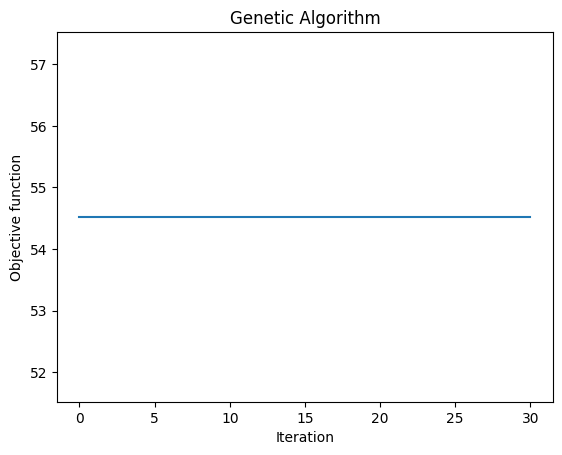

Best parameters found:
{'max_num_iteration': 30, 'population_size': 100, 'mutation_probability': 0.01, 'elit_ratio': 0.01, 'crossover_probability': 0.6, 'parents_portion': 0.2, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}


In [115]:
import itertools
boundaries = np.array(X.describe().loc[["min","max"],:].T)

import itertools

# Define parameter grid
param_grid = {
    'max_num_iteration': [30, 50, 100],
    'population_size': [100, 250, 500],
    'mutation_probability': [0.01, 0.02, 0.05],
    'elit_ratio': [0.01, 0.02, 0.05],
    'crossover_probability': [0.6, 0.8, 0.9],
    'parents_portion': [0.2, 0.4, 0.6],
    'crossover_type': ['uniform', 'one_point', 'two_point'],
    'max_iteration_without_improv': [None, 10, 20]
}

best_score = float('inf')
best_params = None

# Boolean flag to control the loop
found_best_params = False

# Iterate over all parameter combinations
for params in itertools.product(*param_grid.values()):
    if found_best_params:
        break  # Exit the loop if the best parameters are found
    # Set up parameters for the GA model
    algorithm_param = dict(zip(param_grid.keys(), params))

    # Initialize GA model
    ga_model = ga(function=obj_fun, dimension=15, variable_type='real', variable_boundaries=boundaries, algorithm_parameters=algorithm_param)

    # Run the GA model
    ga_model.run()

    # Get the function value (objective value)
    function_value = ga_model.output_dict['function']

    # Update the best score and parameters if needed
    if function_value < best_score:
        best_score = function_value
        best_params = algorithm_param
        # Set the flag to indicate we've found the best parameters
        found_best_params = True

# Print the best parameters found
print("Best parameters found:")
print(best_params)


 The best solution found:
 [2.94081719e-01 5.38041768e+01 2.73783078e+02 4.74478715e+01
 8.50560008e-01 5.06893468e-01 8.82969482e-01 6.49174215e-01
 3.19402445e-01 3.37321623e-01 2.18426510e-01 1.35802538e-01
 6.46896553e-01 3.91500964e-01 7.74514119e-01]

 Objective function:
 54.52174377441406


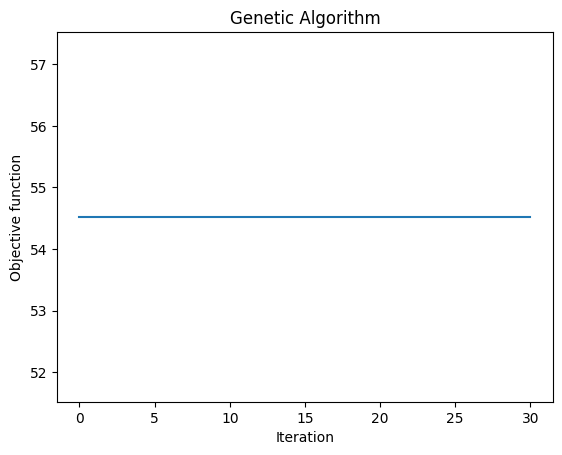

Best parameters found:
{'max_num_iteration': 30, 'population_size': 100, 'mutation_probability': 0.01, 'elit_ratio': 0.01, 'crossover_probability': 0.6, 'parents_portion': 0.2, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}


In [109]:
boundaries = np.array(X.describe().loc[["min","max"],:].T)
param_grid = {
    'max_num_iteration': [30, 50, 100],
    'population_size': [100, 250, 500],
    'mutation_probability': [0.01, 0.02, 0.05],
    'elit_ratio': [0.01, 0.02, 0.05],
    'crossover_probability': [0.6, 0.8, 0.9],
    'parents_portion': [0.2, 0.4, 0.6],
    'crossover_type': ['uniform', 'one_point', 'two_point'],
    'max_iteration_without_improv': [None, 10, 20]
}

best_score = float('inf')
best_params = None
found_best_params = False

for max_num_iteration in param_grid['max_num_iteration']:
    for population_size in param_grid['population_size']:
        for mutation_probability in param_grid['mutation_probability']:
            for elit_ratio in param_grid['elit_ratio']:
                for crossover_probability in param_grid['crossover_probability']:
                    for parents_portion in param_grid['parents_portion']:
                        for crossover_type in param_grid['crossover_type']:
                            for max_iteration_without_improv in param_grid['max_iteration_without_improv']:
                                # Set up parameters for the GA model
                                algorithm_param = {
                                    'max_num_iteration': max_num_iteration,
                                    'population_size': population_size,
                                    'mutation_probability': mutation_probability,
                                    'elit_ratio': elit_ratio,
                                    'crossover_probability': crossover_probability,
                                    'parents_portion': parents_portion,
                                    'crossover_type': crossover_type,
                                    'max_iteration_without_improv': max_iteration_without_improv
                                }

                                # Initialize GA model
                                ga_model = ga(function=obj_fun, dimension=15, variable_type='real', variable_boundaries=boundaries, algorithm_parameters=algorithm_param)

                                # Run the GA model
                                ga_model.run()

                                # Get the function value (objective value)
                                function_value = ga_model.output_dict['function']

                                # Update the best score and parameters if needed
                                if function_value < best_score:
                                    best_score = function_value
                                    best_params = algorithm_param

                                    # Set the flag to indicate we've found the best parameters
                                    found_best_params = True

                                    # Break out of the loop
                                    break
                            if found_best_params:
                                break
                        if found_best_params:
                            break
                    if found_best_params:
                        break
                if found_best_params:
                    break
            if found_best_params:
                break
        if found_best_params:
            break
    if found_best_params:
        break

# Print the best parameters found
print("Best parameters found:")
print(best_params)


In [ ]:
result = ga_model.output_dict
result